In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("usmanafzaal/strawberry-disease-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 534M/534M [00:06<00:00, 80.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1


In [ ]:
dataset_dir = path

for root, dirs, files in os.walk(dataset_dir):
    print(f"Direktori: {root}")
    print(f"Subfolder: {dirs}")
    print(f"Files: {files}")
    print()

Direktori: /root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1
Subfolder: ['Test Disease Severity Level', 'val', 'train', 'test']
Files: ['Dataset.txt']

Direktori: /root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1/Test Disease Severity Level
Subfolder: ['Level 2', 'Level 1']
Files: []

Direktori: /root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1/Test Disease Severity Level/Level 2
Subfolder: []
Files: ['gray_mold411.jpg', 'powdery_mildew_fruit161.json', 'leaf_spot616.jpg', 'powdery_mildew_fruit163.json', 'blossom_blight202.json', 'angular_leafspot429.json', 'gray_mold551.jpg', 'gray_mold584.json', 'angular_leafspot454.jpg', 'leaf_spot540.json', 'gray_mold439.json', 'leaf_spot568.json', 'gray_mold561.jpg', 'blossom_blight152.json', 'powdery_mildew_fruit139.json', 'powdery_mildew_leaf447.json', 'powdery_mildew_leaf378.jpg', 'gray_mold576.jpg', 'leaf_spot621.json', 

In [ ]:
# Path to dataset
base_path = '/root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1/'
train_path = '/root/.cache/kagglehub/datasets/usmanafzaal/strawberry-disease-detection-dataset/versions/1/train/'

# Loop through all subdirectories in the base directory
penyakit_class = {}

for root, dirs, files in os.walk(train_path):
  for file in files:
    if file.endswith(".jpg"):
      # Extract class name (everything before the first number)
      match_string = re.match(r"([a-zA-Z_]+)\d+\.jpg", file)
      if match_string:
          class_name = match_string.group(1)
          if class_name in penyakit_class:
              penyakit_class[class_name] += 1
          else:
              penyakit_class[class_name] = 1


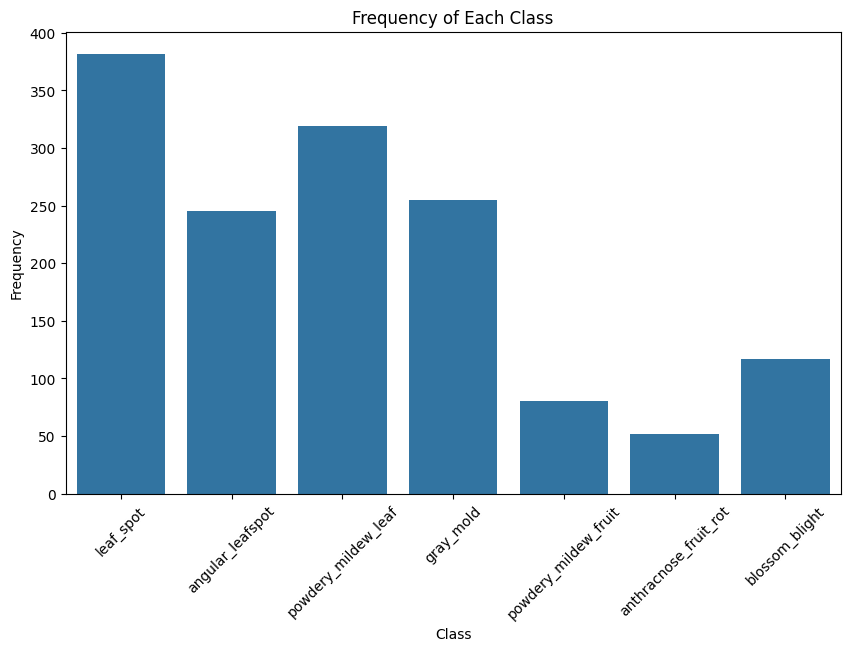

In [ ]:
data = pd.DataFrame(list(penyakit_class.items()), columns=['Class', 'Frequency'])

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Frequency', data=data)
plt.xticks(rotation=45)
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from PIL import Image

# Plotting the first image of each class
fig, axs = plt.subplots(len(penyakit_class), 3, figsize=(15, len(penyakit_class) * 3))

for i, category in enumerate(penyakit_class):
    count = 0
    for root, dirs, files in os.walk(train_path):
        for file in files:
            if file.endswith(".jpg"):
                match_string = re.match(f"{category}\d+\.jpg", file)
                if match_string:
                    img_path = os.path.join(root, file)
                    print(f"Loading image for {category}: {img_path}")
                    img = Image.open(img_path)
                    axs[i, count].imshow(img)
                    axs[i, count].set_title(f"{category} {count + 1}")
                    axs[i, count].axis('off')
                    count += 1
                    if count == 3:  # Stop after finding 3 images
                        break
        if count == 3:
            break

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

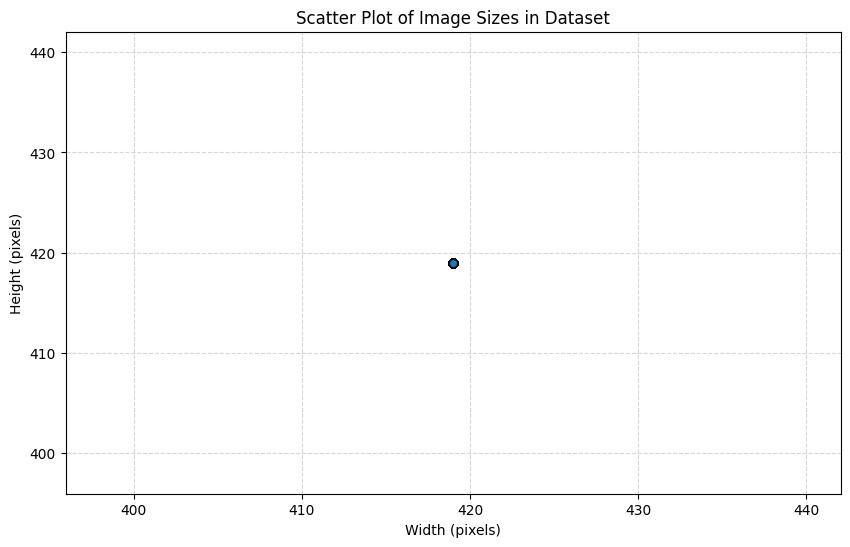

In [ ]:
def get_image_sizes(base_directory):
    image_sizes = []

    # Traverse all directories and files
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.endswith(".jpg"):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_sizes.append((width, height))
                except Exception as e:
                    print(f"Error reading image {img_path}: {e}")

    return image_sizes

# Get image sizes
image_sizes = get_image_sizes(train_path)

# Extract width and height for scatter plot
widths, heights = zip(*image_sizes)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.7, edgecolors="k")
plt.title("Scatter Plot of Image Sizes in Dataset")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()